# 4.7.8 회귀 및 릿지 모델

# 책에 기술된 코딩문은 아래 부분에 표시해 두었음. 그 부분에 도달할 때까지는 참조 코딩문임

# 연속변수 타겟일 경우 표준화 데이터셋 Regression 모델

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('house-standard-VALP.csv')                                           
df.shape

(20495, 93)

In [2]:
data = df.drop(['VALP'], axis=1)   # 타겟변수(VALP임에 주의)를 제외한 입력변수를 data에 저장
target = df['VALP']                # 타겟변수만 target에 저장

# 50:50 data partition.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의 

print("X_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape) 

X_train shape: (10247, 92)
X_test shape: (10248, 92)


In [3]:
# 연속변수 타겟변수일 때 Linear Regression 모델 (Default 모델)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linr = LinearRegression(n_jobs=-1)
model = linr.fit(X_train, y_train)
pred = model.predict(X_test)

print ("Linear Regression Training set r2 score:{:.5f}".format(model.score(X_train, y_train))) 
print ("Linear Regression Test set r2 score:{:.5f}".format(r2_score(y_test, pred))) 

Linear Regression Training set r2 score:0.34406
Linear Regression Test set r2 score:0.33370


# 연속변수 타겟일 경우 표준화 데이터셋 Ridge 모델

In [25]:
# 연속변수 타겟변수일 때 Ridge 모델 (Default 모델)
from sklearn.linear_model import Ridge
Ridge = Ridge()
model = Ridge.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

print ("Linear Regression Training set score:{:.5f}".format(model.score(X_train, y_train))) 
print ("Linear Regression Test set score:{:.5f}".format(r2_score(y_test, pred)))

Linear Regression Training set score:0.34405
Linear Regression Test set score:0.33379


In [29]:
# 연속변수 타겟변수일 때 Ridge 모델 (Default 모델)
from sklearn.linear_model import Ridge
Ridge = Ridge()

In [30]:
# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV

params = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],\
         'solver':['auto', 'svd', 'lsqr', 'cholesky','sparse_cg','sag','saga','lbfgs']}

grid_Ridge = GridSearchCV(clf_Ridge, param_grid=params, scoring='r2', cv=5,\
                       n_jobs=-1, verbose=1)
grid_Ridge.fit(X_train, y_train)

print("GridSearchCV max score:{:.5f}".format(grid_Ridge.best_score_))
print("GridSearchCV best parameter:", (grid_Ridge.best_params_)) 

Fitting 5 folds for each of 56 candidates, totalling 280 fits


C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.33051397 0.33051397 0.33082257 0.33051397 0.33072646 0.33054219
 0.33056991        nan 0.33051743 0.33051743 0.33082319 0.33051743
 0.3307479  0.33054566 0.3305731         nan 0.33055065 0.33055065
 0.3308294  0.33055065 0.33074615 0.33057655 0.33059955        nan
 0.33078908 0.33078908 0.33101199 0.33078908 0.33086527 0.33080242
 0.33081024        nan 0.33139465 0.33139465 0.3313423  0.33139465
 0.33132413 0.33140072 0.33139226        nan 0.32798663 0.32798663
 0.32795591 0.32798663 0.3279425  0.32798531 0.32799798        nan
 0.29929105 0.29929105 0.29922224 0.29929105 0.29928808 0.29927155
 0.2992906         nan]
  warnings.warn(


GridSearchCV max score:0.33140
GridSearchCV best parameter: {'alpha': 10, 'solver': 'sag'}


In [31]:
best_clf = grid_Ridge.best_estimator_
pred = best_clf.predict(X_test)

print("R2 Score on test set:{:.5f}".format(best_clf.score(X_test, y_test)))

R2 Score on test set:0.33413


# 연속변수 타겟일 경우 Lasso 모델
# 실행 결과 Lasso 모델은 성능이 전혀 나오지 않음

In [35]:
# 연속변수 타겟변수일 때 Ridge 모델 (Default 모델)
from sklearn.linear_model import Lasso
Lasso = Lasso()
model = Lasso.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

print ("Linear Regression Training set score:{:.5f}".format(clf_Lasso.score(X_train, y_train))) 
print ("Linear Regression Test set score:{:.5f}".format(r2_score(pred, y_test,)))

Linear Regression Training set score:-211.26113
Linear Regression Test set score:-199811771404745360482806792192.00000


# 로그변환한 데이터로 Regression 실행

In [33]:
import pandas as pd
import numpy as np
df = pd.read_csv('house-log-VALP.csv') 
                                       
df.shape

(20495, 93)

In [34]:
data = df.drop(['VALP'], axis=1)   # 타겟변수(VALP임에 주의)를 제외한 입력변수를 data에 저장
target = df['VALP']                # 타겟변수만 target에 저장

# 50:50 data partition.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의 

print("X_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape) 

X_train shape: (10247, 92)
X_test shape: (10248, 92)


In [37]:
# 연속변수 타겟변수일 때 Linear Regression 모델 (Default 모델)
from sklearn.linear_model import LinearRegression
lin_r = LinearRegression(n_jobs=-1)
model = lin_r.fit(X_train, y_train)
pred = model.predict(X_test)

print ("Linear Regression Training set score:{:.5f}".format(model.score(X_train, y_train))) 
print ("Linear Regression Test set score:{:.5f}".format(r2_score(y_test, pred)))

Linear Regression Training set score:0.31519
Linear Regression Test set score:0.28534


# 로그변환한 데이터로 Ridge실행

In [42]:
# 연속변수 타겟변수일 때 Lasso 모델 (Default 모델)
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
Ridge = Ridge()
model = Ridge.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

print ("Ridge Training set score:{:.5f}".format(model.score(X_train, y_train))) 
print ("Ridge Test set score:{:.5f}".format(r2_score(y_test, pred)))

Ridge Training set score:0.31901
Ridge Test set score:0.28796


In [44]:
# 연속변수 타겟변수일 때 Lasso 모델 (Default 모델)
from sklearn.linear_model import Ridge
Ridge = Ridge()

In [45]:
# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold  

params = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],\
         'solver':['auto', 'svd', 'lsqr', 'cholesky','sparse_cg','sag','saga','lbfgs']}

grid_Ridge = GridSearchCV(Ridge, param_grid=params, scoring='r2', cv=5,\
                       n_jobs=-1, verbose=1)
grid_Ridge.fit(X_train, y_train)

print("GridSearchCV max score:{:.5f}".format(grid_Ridge.best_score_))
print("GridSearchCV best parameter:", (grid_Ridge.best_params_)) 

Fitting 5 folds for each of 56 candidates, totalling 280 fits
GridSearchCV max score:0.30570
GridSearchCV best parameter: {'alpha': 10, 'solver': 'svd'}


C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.30461978 0.30461978 0.30426224 0.30461978 0.3046637  0.30475244
 0.30482444        nan 0.30462598 0.30462598 0.3042634  0.30462598
 0.30468211 0.30476111 0.3048275         nan 0.30468506 0.30468506
 0.30427497 0.30468506 0.3046811  0.30480349 0.30486965        nan
 0.30508334 0.30508334 0.30438394 0.30508334 0.305233   0.30513024
 0.30516187        nan 0.30570426 0.30570426 0.30496785 0.30570426
 0.30563983 0.30570241 0.30569633        nan 0.30110323 0.30110323
 0.3010157  0.30110323 0.30108606 0.30109459 0.30108187        nan
 0.26764129 0.26764129 0.26752618 0.26764129 0.26761919 0.2676401
 0.26765052        nan]
  warnings.warn(


In [46]:
best_clf = grid_Ridge.best_estimator_
pred = best_clf.predict(X_test)

print("R2 Score on test set:{:.5f}".format(best_clf.score(X_test, y_test)))
#print("R2 Score on test set:{:.5f}".format(r2_score(y_test, pred)))

R2 Score on test set:0.28864


# 이제부터 책에 나온 코딩임에 유의

# Unscaled 데이터로 Regression 실행

In [47]:
import pandas as pd
import numpy as np
df = pd.read_csv('house-unscaled-VALP.csv') # 데이터 불러오기
df.shape

(20495, 93)

In [48]:
data = df.drop(['VALP'], axis=1)   # 타겟변수(VALP임에 주의)를 제외한 입력변수를 data에 저장
target = df['VALP']                # 타겟변수만 target에 저장

# 50:50 data partition.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의 

print("X_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape) 

X_train shape: (10247, 92)
X_test shape: (10248, 92)


In [49]:
# 연속변수 타겟변수일 때 Linear Regression 모델 (Default 모델)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linr = LinearRegression(n_jobs=-1)
model = linr.fit(X_train, y_train)
pred = model.predict(X_test)

print ("Linear Regression Training set score:{:.5f}".format(model.score(X_train, y_train))) 
print ("Linear Regression Test set r2 score:{:.5f}".format(r2_score(y_test, pred)))

Linear Regression Training set score:0.34406
Linear Regression Test set r2 score:0.33370


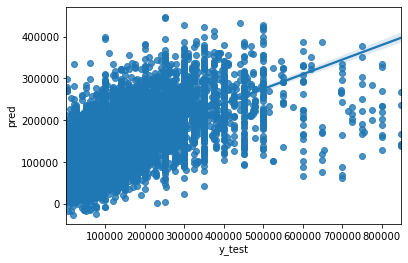

In [51]:
import seaborn as sns

final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(pred)], axis = 1)
final_result.columns = ['y_test','pred']
sns.regplot(x = 'y_test', y = 'pred', data = final_result);

# Unscaled 데이터셋일 때 Ridge 모델

In [52]:
# 연속변수 타겟변수일 때 Ridge 모델 (Default 모델).
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
Ridge = Ridge()
model = Ridge.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성.

print ("Linear Regression Training set score:{:.5f}".format(model.score(X_train, y_train))) 
print ("Linear Regression Test set score:{:.5f}".format(r2_score(y_test, pred)))

Linear Regression Training set score:0.34405
Linear Regression Test set score:0.33378


In [54]:
# 연속변수 타겟변수일 때 Ridge 모델 (Default 모델)
from sklearn.linear_model import Ridge
Ridge = Ridge()

In [55]:
# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV

params = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
         'solver':['auto', 'svd', 'lsqr', 'cholesky','sparse_cg','sag','saga','lbfgs']}

grid_Ridge = GridSearchCV(Ridge, param_grid=params, scoring='r2', cv=5,\
                       n_jobs=-1, verbose=1)
grid_Ridge.fit(X_train, y_train)

print("GridSearchCV max score:{:.5f}".format(grid_Ridge.best_score_))
print("GridSearchCV best parameter:", (grid_Ridge.best_params_)) 

Fitting 5 folds for each of 56 candidates, totalling 280 fits
GridSearchCV max score:0.33139
GridSearchCV best parameter: {'alpha': 10, 'solver': 'svd'}


C:\Users\jason\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.33051397 0.33051397 0.15875989 0.33051397 0.15875989 0.17170746
 0.16794827        nan 0.33051743 0.33051743 0.15875989 0.33051743
 0.15875989 0.17171101 0.16794737        nan 0.33055061 0.33055061
 0.15875989 0.33055061 0.15875989 0.17171009 0.16794786        nan
 0.33078865 0.33078865 0.15875989 0.33078865 0.15875989 0.17170861
 0.16795036        nan 0.33139026 0.33139026 0.15875989 0.33139026
 0.15875989 0.17170922 0.1679498         nan 0.32794727 0.32794727
 0.15875989 0.32794727 0.15875989 0.17170904 0.16794881        nan
 0.29963897 0.29963897 0.15875989 0.29963897 0.15875989 0.17170971
 0.16794917        nan]
  warnings.warn(


In [56]:
best_clf = grid_Ridge.best_estimator_
pred = best_clf.predict(X_test)

print("R2 Score on test set:{:.5f}".format(best_clf.score(X_test, y_test)))

R2 Score on test set:0.33410
